# Bike Store Sales Data Analysis

#### Import required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
import numpy as np
%matplotlib inline

#### Read sales data from a csv file  

In [2]:
sales_df = pd.read_csv('sales_data.csv', parse_dates=['Date'])

### The data at a glance

In [3]:
sales_df.head()

Date  Day     Month  Year  Customer_Age       Age_Group  \
0 2013-11-26   26  November  2013            19     Youth (<25)   
1 2015-11-26   26  November  2015            19     Youth (<25)   
2 2014-03-23   23     March  2014            49  Adults (35-64)   
3 2016-03-23   23     March  2016            49  Adults (35-64)   
4 2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               8         45         120     590   360   
1  Hitch Rack - 4-Bike               8         45         120     590   360   
2  Hitch Rack - 4-Bike              23         45         120    1366  1035   
3  Hitch Rack - 4-Bike              20         45         120    1188   900   
4  Hitch Rack - 4-Bike               4         45         120     238   180   

   Revenue  
0      950  
1      950  
2     2401  
3     2088  
4      418

#### Number of rows and columns

In [4]:
sales_df.shape

(113036, 18)

##### 113036 rows of data and 18 columns

#### Some information about data in columns

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

#### Missing values for each column

In [6]:
sales_df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

##### No missing values

#### Descriptive Statistics of Numerical columns

In [7]:
sales_df.describe()

Date            Day           Year  \
count                         113036  113036.000000  113036.000000   
mean   2014-11-23 12:14:55.063519232      15.665753    2014.401739   
min              2011-01-01 00:00:00       1.000000    2011.000000   
25%              2013-12-22 00:00:00       8.000000    2013.000000   
50%              2014-06-27 00:00:00      16.000000    2014.000000   
75%              2016-01-09 00:00:00      23.000000    2016.000000   
max              2016-07-31 00:00:00      31.000000    2016.000000   
std                              NaN       8.781567       1.272510   

        Customer_Age  Order_Quantity      Unit_Cost     Unit_Price  \
count  113036.000000   113036.000000  113036.000000  113036.000000   
mean       35.919212       11.901660     267.296366     452.938427   
min        17.000000        1.000000       1.000000       2.000000   
25%        28.000000        2.000000       2.000000       5.000000   
50%        35.000000       10.000000       9.000000      24.000000   
75%        43.000000       20.000000      42.000000      70.000000   
max        87.000000       32.000000    2171.000000    3578.000000   
std        11.021936        9.561857     549.835483     922.071219   

              Profit           Cost        Revenue  
count  113036.000000  113036.000000  113036.000000  
mean      285.051665     469.318695     754.370360  
min       -30.000000       1.000000       2.000000  
25%        29.000000      28.000000      63.000000  
50%       101.000000     108.000000     223.000000  
75%       358.000000     432.000000     800.000000  
max     15096.000000   42978.000000   58074.000000  
std       453.887443     884.866118    1309.094674

#### The ranges of values in numerical columns seem reasonable.
##### Data is for the period between 2011 and 2016
##### Customer Age is in the range of 17 to 87
##### Average number of order quantity = 11.9, Maximum = 32 
##### Minimum Unit Cost = 1 and Maximum Unit Cost = 2171
##### Minimum Unit Price = 2 and Maximum Unit Price = 3578
##### Average Profit = 285, Minimum Profit = -30 ? and Maximum Profit = 15096
##### Average Revenue = 754.3, Maximum Revenue = 58074

#### Box Plots for Numerical Columns

Year                 Axes(0.125,0.53;0.227941x0.35)
Customer_Age      Axes(0.398529,0.53;0.227941x0.35)
Order_Quantity    Axes(0.672059,0.53;0.227941x0.35)
Unit_Cost            Axes(0.125,0.11;0.227941x0.35)
Unit_Price        Axes(0.398529,0.11;0.227941x0.35)
Profit            Axes(0.672059,0.11;0.227941x0.35)
dtype: object

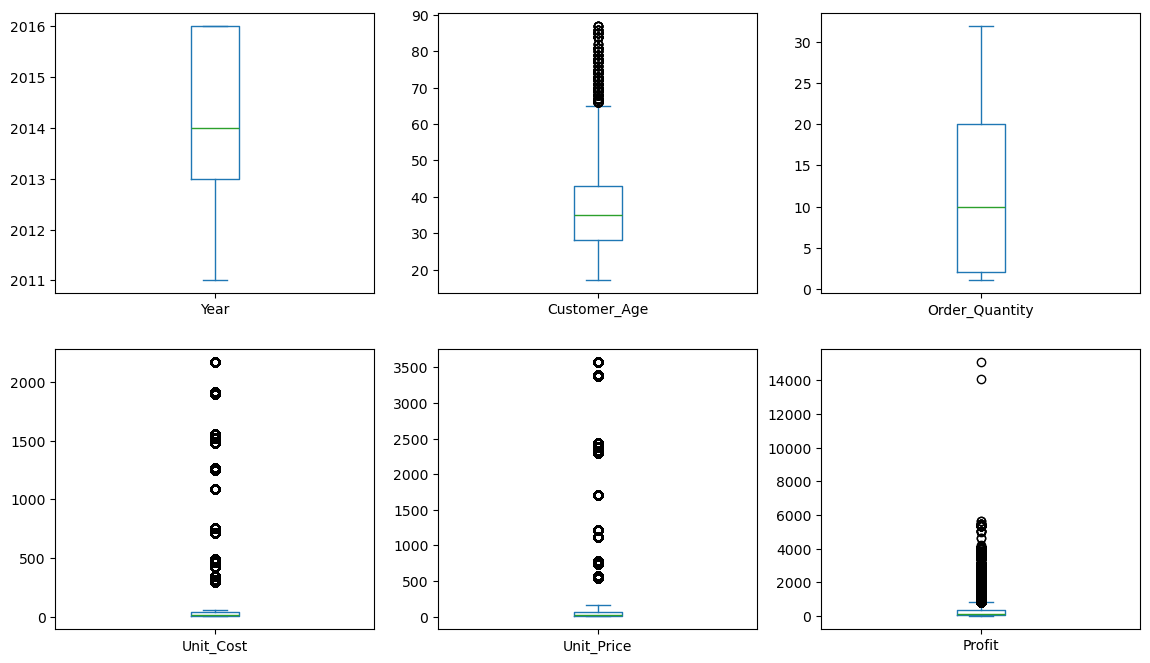

In [8]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales_df[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

#### Relationship between Numerical Columns

In [9]:
numerical_df = sales_df.select_dtypes(include=[float, int])
corr = numerical_df.corr()
corr

Day      Year  Customer_Age  Order_Quantity  Unit_Cost  \
Day             1.000000 -0.007635     -0.014296       -0.002412   0.003133   
Year           -0.007635  1.000000      0.040994        0.123169  -0.217575   
Customer_Age   -0.014296  0.040994      1.000000        0.026887  -0.021374   
Order_Quantity -0.002412  0.123169      0.026887        1.000000  -0.515835   
Unit_Cost       0.003133 -0.217575     -0.021374       -0.515835   1.000000   
Unit_Price      0.003207 -0.213673     -0.020262       -0.515925   0.997894   
Profit          0.004623 -0.181525      0.004319       -0.238863   0.741020   
Cost            0.003329 -0.215604     -0.016013       -0.340382   0.829869   
Revenue         0.003853 -0.208673     -0.009326       -0.312895   0.817865   

                Unit_Price    Profit      Cost   Revenue  
Day               0.003207  0.004623  0.003329  0.003853  
Year             -0.213673 -0.181525 -0.215604 -0.208673  
Customer_Age     -0.020262  0.004319 -0.016013 -0.009326  
Order_Quantity   -0.515925 -0.238863 -0.340382 -0.312895  
Unit_Cost         0.997894  0.741020  0.829869  0.817865  
Unit_Price        1.000000  0.749870  0.826301  0.818522  
Profit            0.749870  1.000000  0.902233  0.956572  
Cost              0.826301  0.902233  1.000000  0.988758  
Revenue           0.818522  0.956572  0.988758  1.000000

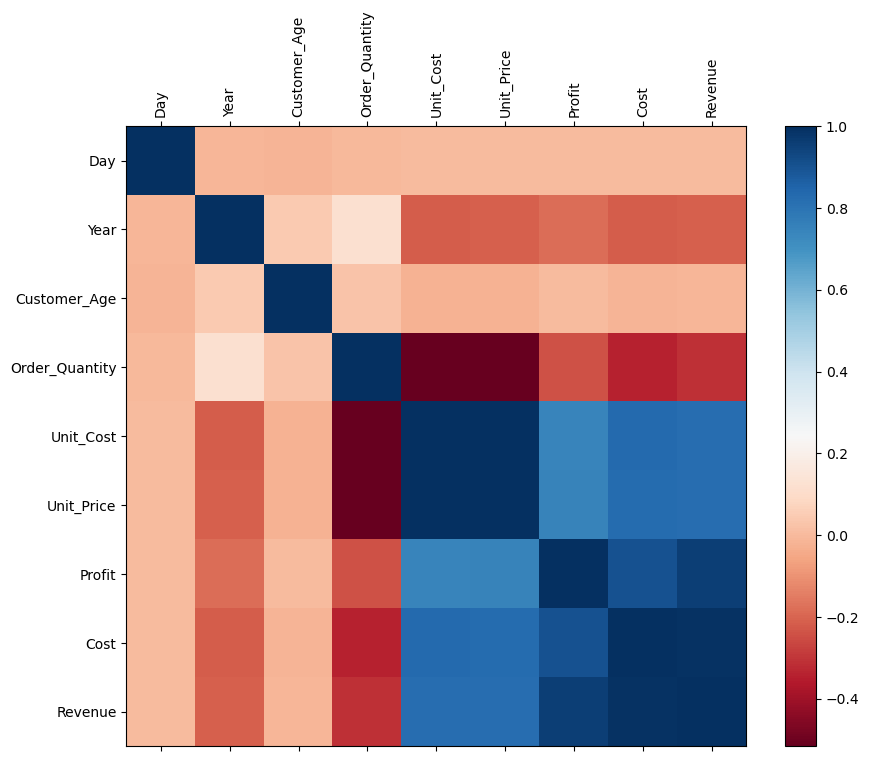

In [10]:
fig = plt.figure(figsize=(10,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

#### Scatter Plot between Revenue and Order Quantity, Unit Cost, Unit Price, Profit

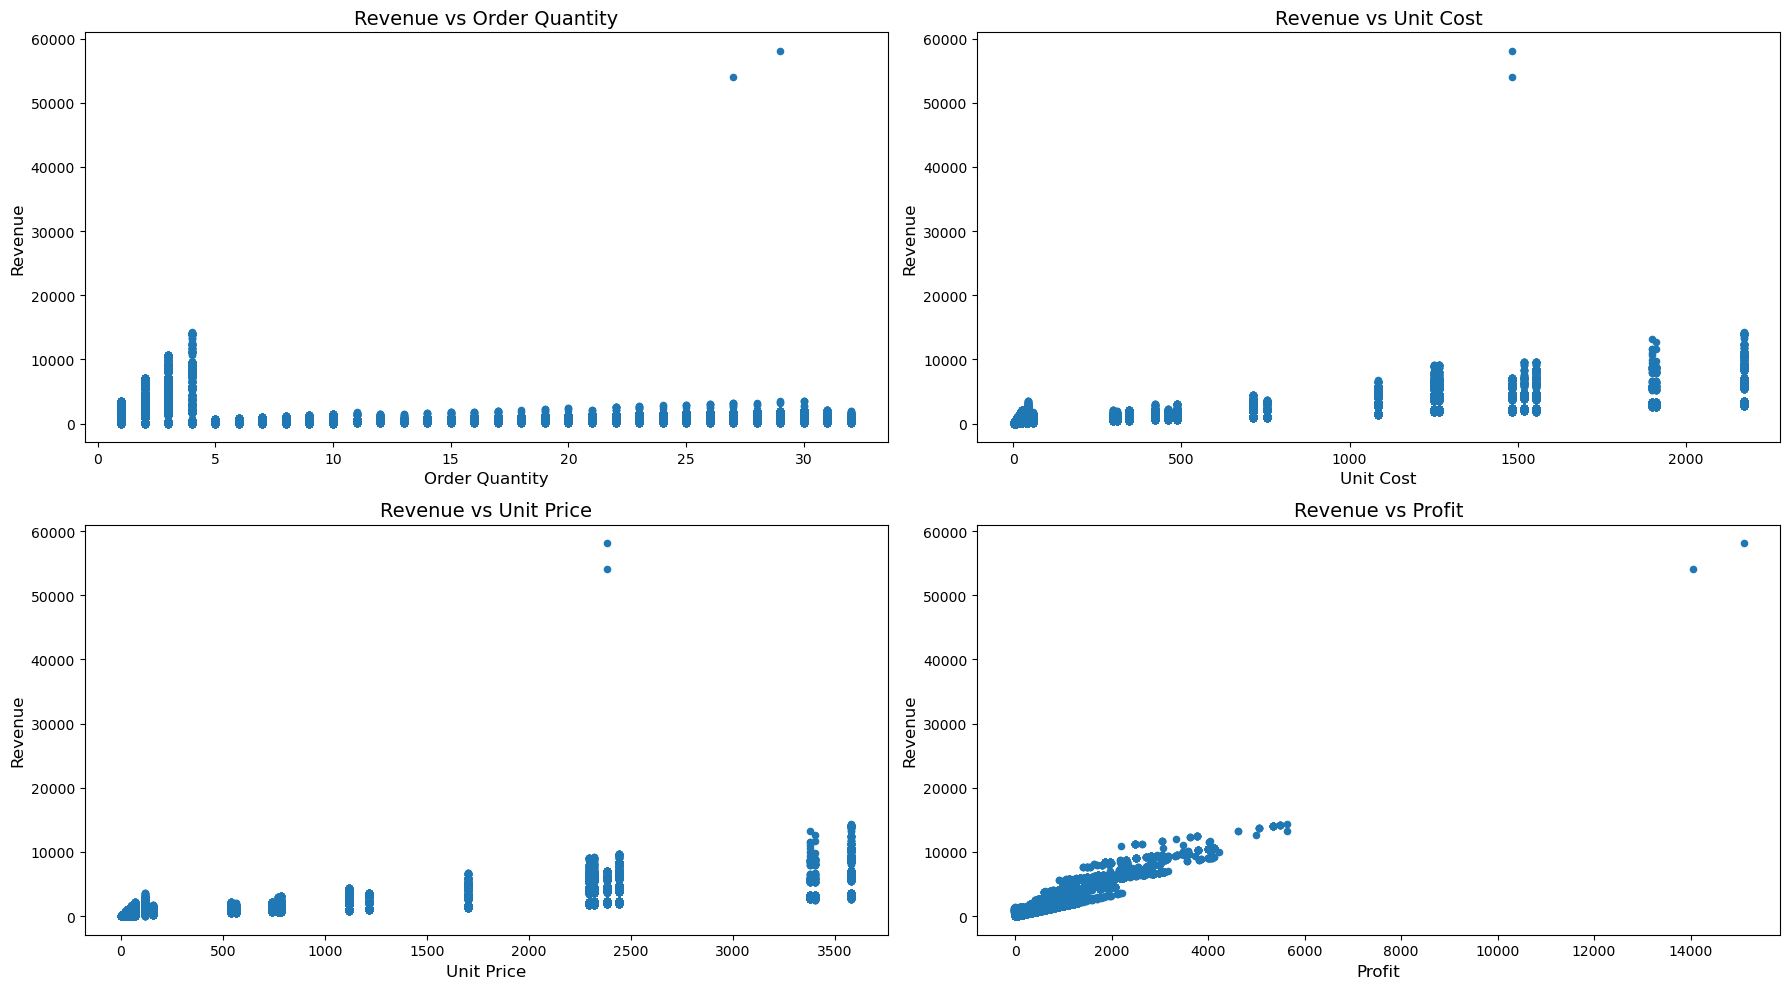

In [11]:
fig = plt.figure(figsize=(18,10))
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)
sales_df[['Order_Quantity', 'Revenue']].plot(kind='scatter', x='Order_Quantity', y='Revenue', ax=ax0)
ax0.set_xlabel('Order Quantity', fontsize=12)
ax0.set_ylabel('Revenue', fontsize=12)
ax0.set_title('Revenue vs Order Quantity', fontsize=14)
sales_df[['Unit_Cost', 'Revenue']].plot(kind='scatter', x='Unit_Cost', y='Revenue', ax=ax1)
ax1.set_xlabel('Unit Cost', fontsize=12)
ax1.set_ylabel('Revenue', fontsize=12)
ax1.set_title('Revenue vs Unit Cost', fontsize=14)
sales_df[['Unit_Price', 'Revenue']].plot(kind='scatter', x='Unit_Price', y='Revenue', ax=ax2)
ax2.set_xlabel('Unit Price', fontsize=12)
ax2.set_ylabel('Revenue', fontsize=12)
ax2.set_title('Revenue vs Unit Price', fontsize=14)
sales_df[['Profit', 'Revenue']].plot(kind='scatter', x='Profit', y='Revenue', ax=ax3)
ax3.set_xlabel('Profit', fontsize=12)
ax3.set_ylabel('Revenue', fontsize=12)
ax3.set_title('Revenue vs Profit', fontsize=14)
plt.tight_layout()
plt.show()

#### Products with Highest Unit Cost

In [12]:
max_unit_cost = sales_df.loc[sales_df['Unit_Cost'] == sales_df['Unit_Cost'].max(), ['Product_Category', 'Sub_Category', 'Product', 'Unit_Cost', 'Unit_Price']].drop_duplicates()
max_unit_cost.reset_index(drop=True)

Product_Category Sub_Category           Product  Unit_Cost  Unit_Price
0            Bikes   Road Bikes  Road-150 Red, 48       2171        3578
1            Bikes   Road Bikes  Road-150 Red, 62       2171        3578
2            Bikes   Road Bikes  Road-150 Red, 52       2171        3578
3            Bikes   Road Bikes  Road-150 Red, 44       2171        3578
4            Bikes   Road Bikes  Road-150 Red, 56       2171        3578

##### Products with highest Unit Cost are the same with highest Unit Price

#### Order with profit = -30

In [13]:
sales_df[sales_df['Profit'] == sales_df['Profit'].min()]

Date  Day     Month  Year  Customer_Age             Age_Group  \
48571 2015-12-17   17  December  2015            27  Young Adults (25-34)   

      Customer_Gender Country    State Product_Category Sub_Category  \
48571               F  France  Yveline         Clothing      Jerseys   

                               Product  Order_Quantity  Unit_Cost  Unit_Price  \
48571  Short-Sleeve Classic Jersey, XL              31         42          54   

       Profit  Cost  Revenue  
48571     -30  1302     1272

#### Products Category

In [14]:
product_category = sales_df['Product_Category'].unique()
product_category

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

##### There are three main product categories: Accessories, Clothing and Bikes

#### When different products were added to Bike Store

In [15]:
sales_df.groupby('Year')['Product_Category'].unique().reset_index()

Year                Product_Category
0  2011                         [Bikes]
1  2012                         [Bikes]
2  2013  [Accessories, Clothing, Bikes]
3  2014  [Accessories, Clothing, Bikes]
4  2015  [Accessories, Clothing, Bikes]
5  2016  [Accessories, Clothing, Bikes]

##### Accessories and Clothing were added from 2013

#### Countries Products are sold in:

In [16]:
countries = sales_df['Country'].unique()
countries

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

##### Products are sold in: Canada, Australia, United States, Germany, France and United Kingdom

#### Number of Unique Products for each Product category and Sub category

In [17]:
category_info = sales_df.groupby('Product_Category').agg(
    Sub_Category=('Sub_Category', 'nunique'),
    Products=('Product', 'nunique')
).reset_index()
category_info

Product_Category  Sub_Category  Products
0      Accessories             8        23
1            Bikes             3        88
2         Clothing             6        23

### Check for inaccurate entries in Cost and Revenue columns

#### Add and Calculate a new `Calculated_Cost` column
Used formula

$$ Calculated\_Cost = Order\_Quantity * Unit\_Cost $$

In [18]:
sales_df['Calculated_Cost'] = sales_df['Order_Quantity'] * sales_df['Unit_Cost']
(sales_df['Calculated_Cost'] != sales_df['Cost']).sum()

0

##### There is nothing wrong with `Cost` cloumn entries.

#### Add and calculate a new `Calculated_Revenue` column

Used formula

$$ Calculated\_Revenue = Cost + Profit $$

In [19]:
sales_df['Calculated_Revenue'] = sales_df['Cost'] + sales_df['Profit']
(sales_df['Calculated_Revenue'] != sales_df['Revenue']).sum()

0

##### There is nothing wrong with `Revenue` cloumn entries.

### Explortory Analysis and Visualization

#### Distribution of Order Quantity

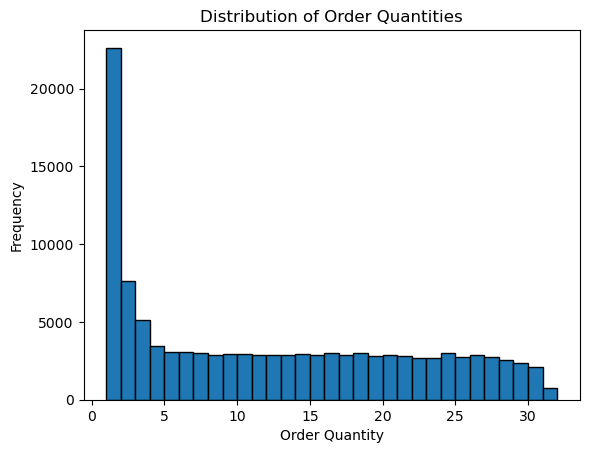

In [20]:
sales_df['Order_Quantity'].plot(kind='hist', edgecolor='black', bins=31)
plt.title('Distribution of Order Quantities')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Function to format the y-ticks in thousands
def thousands_formatter(x, pos):
    return '%1.0fK' % (x * 1e-3)

#### Order Quantity by Product Category

  Product_Category  Order_Quantity
0      Accessories         1054162
1            Bikes           36411
2         Clothing          254743


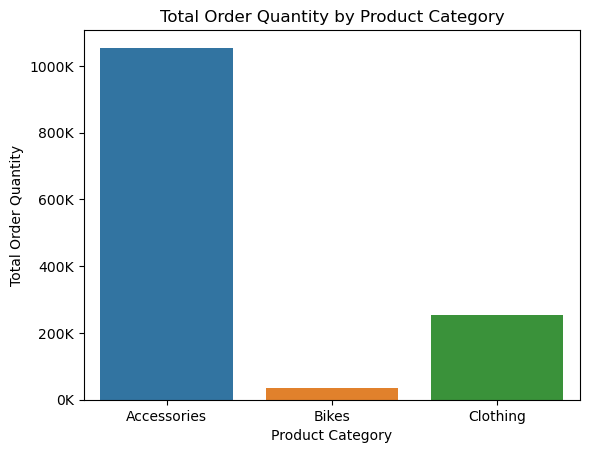

In [22]:
orders = sales_df.groupby('Product_Category')[['Order_Quantity']].sum().reset_index()
print(orders)
ax = sns.barplot(data=orders, x='Product_Category', y='Order_Quantity')
plt.title('Total Order Quantity by Product Category')
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.xlabel('Product Category')
plt.ylabel('Total Order Quantity')
plt.show()

#### Revenue by Year

   Year   Revenue
0  2011   8964888
1  2012   9175983
2  2013  15240037
3  2014  14152724
4  2015  20023991
5  2016  17713385


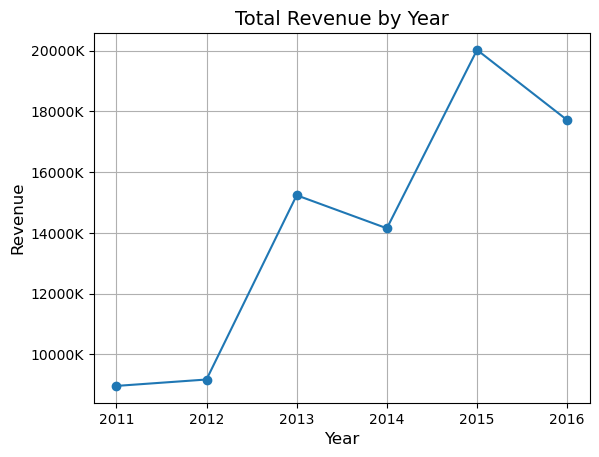

In [23]:
revenue = sales_df.groupby('Year')['Revenue'].sum()
print(revenue.reset_index())
ax = revenue.plot(marker='o')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Total Revenue by Year', fontsize=14)
plt.grid(True)
plt.show()

#### Revenue by month

C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


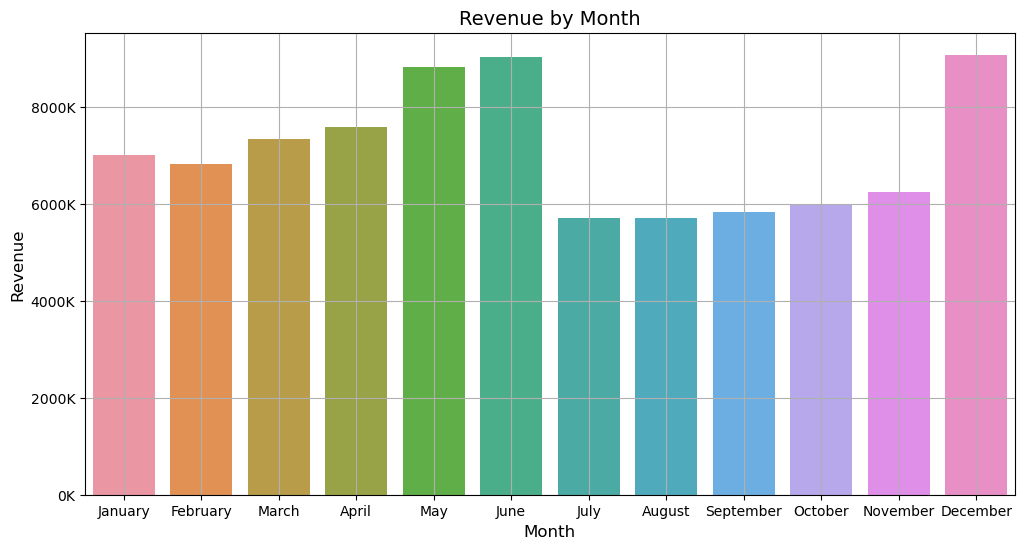

In [24]:
revenue_month = sales_df.groupby('Month')['Revenue'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
revenue_month['Month'] = pd.Categorical(revenue_month['Month'], categories=month_order, ordered=True)
revenue_month.sort_values(by='Month', inplace=True)
fig = plt.figure(figsize=(12,6))
ax = sns.barplot(data=revenue_month, x='Month', y='Revenue')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Revenue by Month', fontsize=14)
plt.grid(True)
plt.show()

#### How did revenue and sales evolve through the years?

#### Revenue

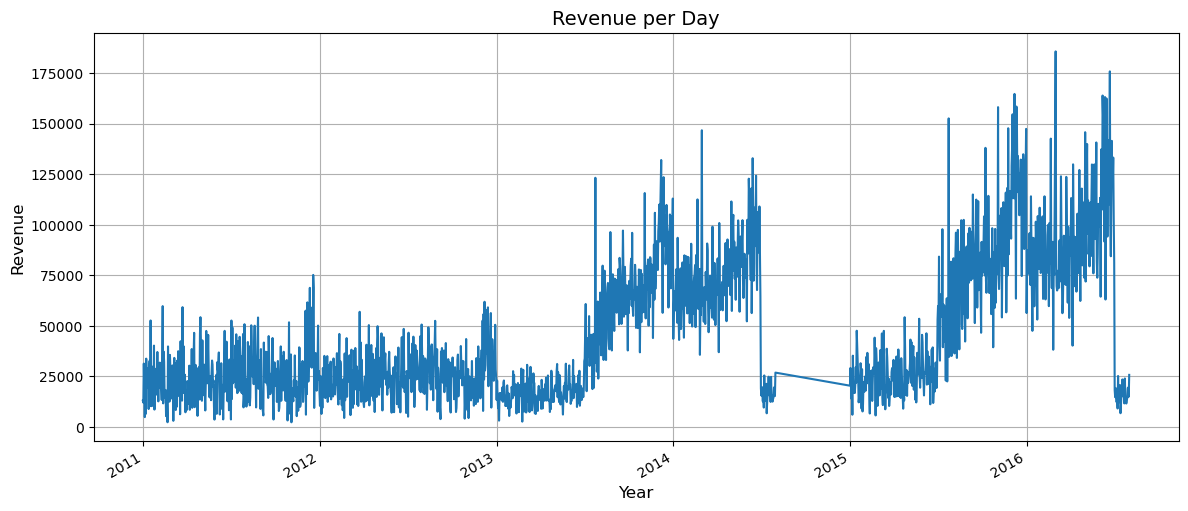

In [25]:
sales_df.groupby('Date')['Revenue'].sum().plot(kind='line', figsize=(14,6))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Revenue per Day', fontsize=14)
plt.grid(True)
plt.show()

#### Sales

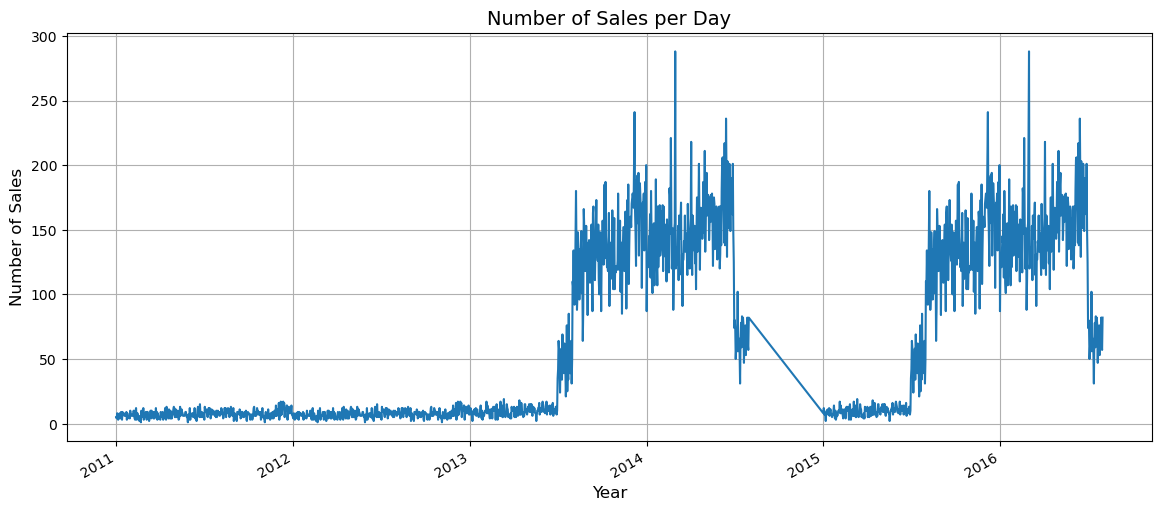

In [26]:
sales_df['Date'].value_counts().plot(kind='line', figsize=(14,6))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.title('Number of Sales per Day', fontsize=14)
plt.grid(True)
plt.show()

#### Revenue by Product Category, Sub Category and Product

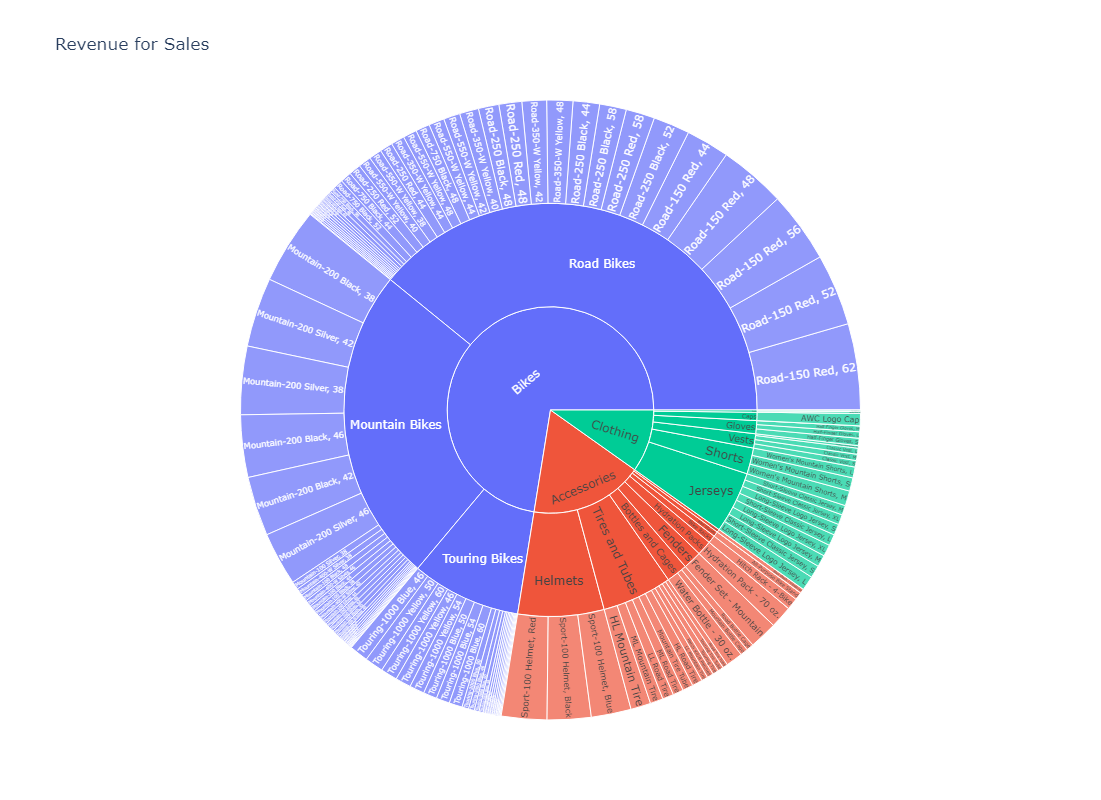

In [27]:
# Sunburst plot for sales revenue
fig = px.sunburst(sales_df, path=['Product_Category', 'Sub_Category', 'Product'], values='Revenue', title='Revenue for Sales')

fig.update_layout(width=1000, height=800) 
fig.show()

#### Revenue by Product Category

  Product_Category   Revenue
0      Accessories  15117992
1            Bikes  61782134
2         Clothing   8370882


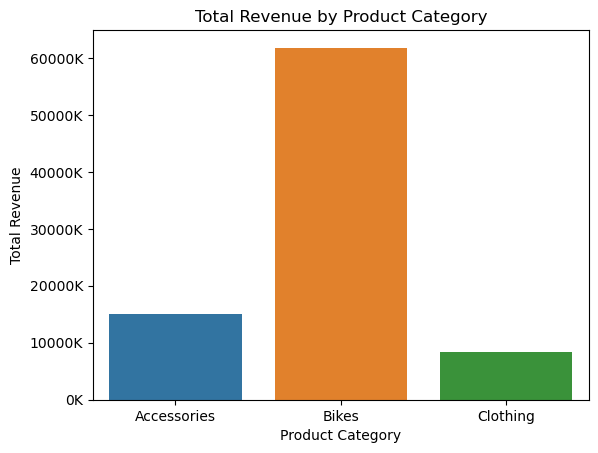

In [28]:
revenue_cat = sales_df.groupby('Product_Category')['Revenue'].sum().reset_index()
print(revenue_cat)
ax = sns.barplot(data=revenue_cat, x='Product_Category', y='Revenue')
plt.title('Total Revenue by Product Category')
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()

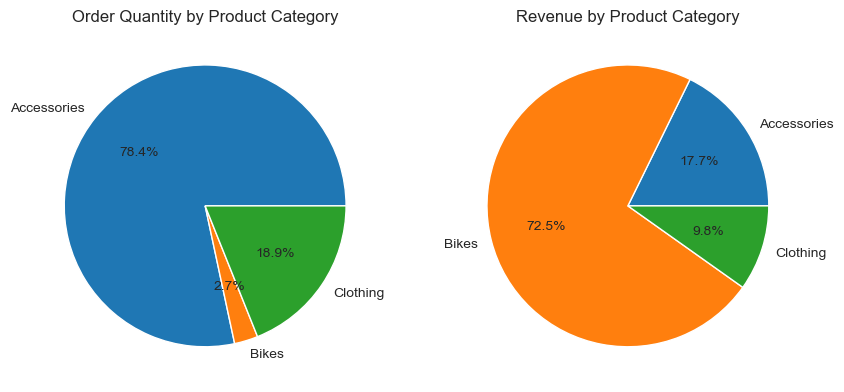

In [29]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
ax0.pie(orders['Order_Quantity'], labels=orders['Product_Category'], autopct='%1.1f%%')
ax0.set_title('Order Quantity by Product Category')
ax0.set_ylabel('')
ax1.pie(revenue_cat['Revenue'], labels=revenue_cat['Product_Category'], autopct='%1.1f%%')
ax1.set_title('Revenue by Product Category')
ax1.set_ylabel('')
plt.show()

##### Based on Pie Charts: Even though the number of Bikes ordered is the lowest it contributes most to Total Revenue 

#### Revenue for Product Category by Year

In [30]:
revenue_year = sales_df.pivot_table(index='Year', columns='Product_Category', values='Revenue', aggfunc='sum', fill_value=0)
revenue_year

Product_Category  Accessories     Bikes  Clothing
Year                                             
2011                        0   8964888         0
2012                        0   9175983         0
2013                  3384215   9858787   1997035
2014                  4293592   7611243   2247889
2015                  3285954  14799083   1938954
2016                  4154231  11372150   2187004

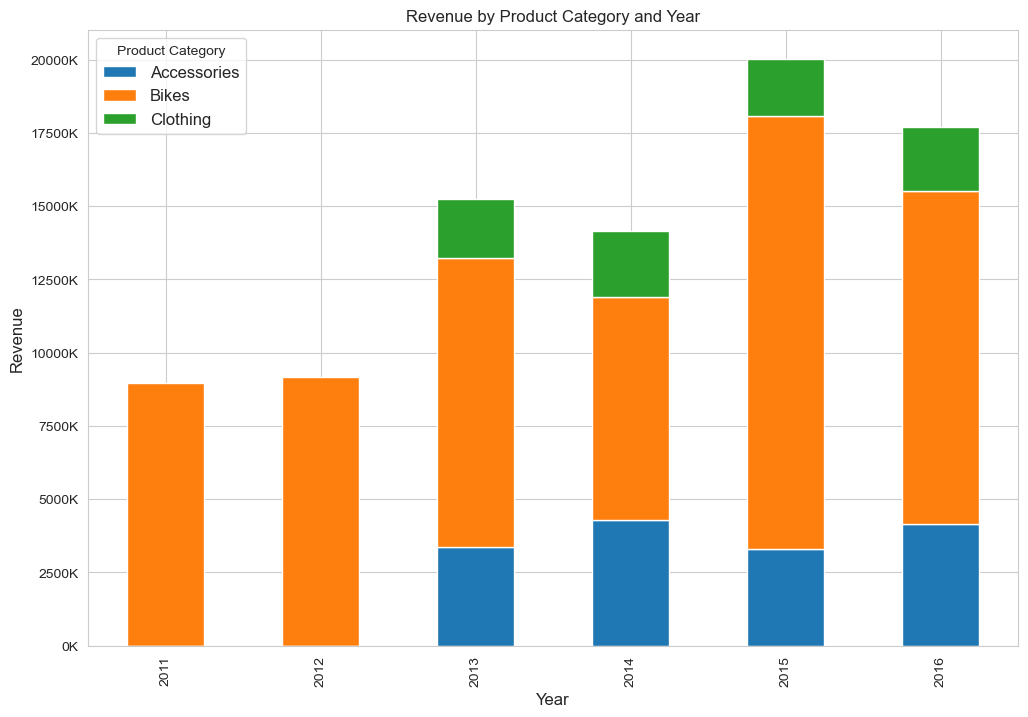

In [31]:
ax =revenue_year.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Revenue by Product Category and Year')
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.legend(title='Product Category', loc='upper left', fontsize=12)

# Display the plot
plt.show()


#### Top 10 Ordered Products

  Product_Category       Sub_Category                  Product  Order_Quantity
0      Accessories  Bottles and Cages    Water Bottle - 30 oz.          164082
1      Accessories    Tires and Tubes      Patch Kit/8 Patches          157583
2      Accessories    Tires and Tubes       Mountain Tire Tube          102792
3         Clothing               Caps             AWC Logo Cap           67264
4      Accessories            Helmets    Sport-100 Helmet, Red           63663
5      Accessories    Tires and Tubes           Road Tire Tube           62296
6      Accessories            Fenders    Fender Set - Mountain           62081
7      Accessories            Helmets  Sport-100 Helmet, Black           62048
8      Accessories    Tires and Tubes        Touring Tire Tube           56802
9      Accessories            Helmets   Sport-100 Helmet, Blue           55895


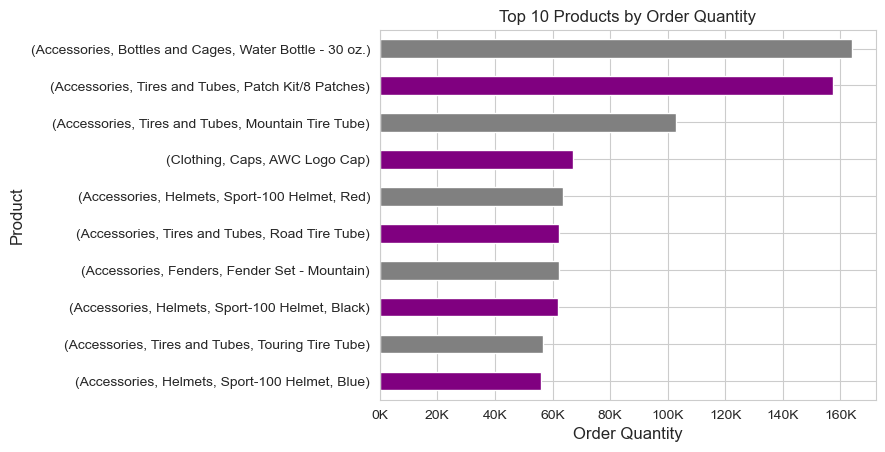

In [32]:
orders_top10 = sales_df.groupby(['Product_Category', 'Sub_Category', 'Product'])['Order_Quantity'].sum()
orders_top10.sort_values(inplace=True)
orders_top10 = orders_top10.tail(10)
print(orders_top10.sort_values(ascending=False).reset_index())
ax = orders_top10.plot(kind='barh', color=['Purple', 'Grey'])
plt.xlabel('Order Quantity', fontsize=12)
plt.ylabel('Product', fontsize=12)
ax.ticklabel_format(style='plain', axis='x')
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.title('Top 10 Products by Order Quantity')
plt.show()

#### Top 10 Products by Revenue

  Product_Category    Sub_Category                  Product  Revenue
0            Bikes      Road Bikes         Road-150 Red, 62  3829416
1            Bikes  Mountain Bikes   Mountain-200 Black, 38  3366248
2            Bikes      Road Bikes         Road-150 Red, 52  3180840
3            Bikes      Road Bikes         Road-150 Red, 56  3158805
4            Bikes  Mountain Bikes  Mountain-200 Silver, 42  3081078
5            Bikes  Mountain Bikes  Mountain-200 Silver, 38  3035442
6            Bikes      Road Bikes         Road-150 Red, 48  2965309
7            Bikes  Mountain Bikes   Mountain-200 Black, 46  2769620
8            Bikes  Mountain Bikes   Mountain-200 Black, 42  2641606
9            Bikes  Mountain Bikes  Mountain-200 Silver, 46  2376146


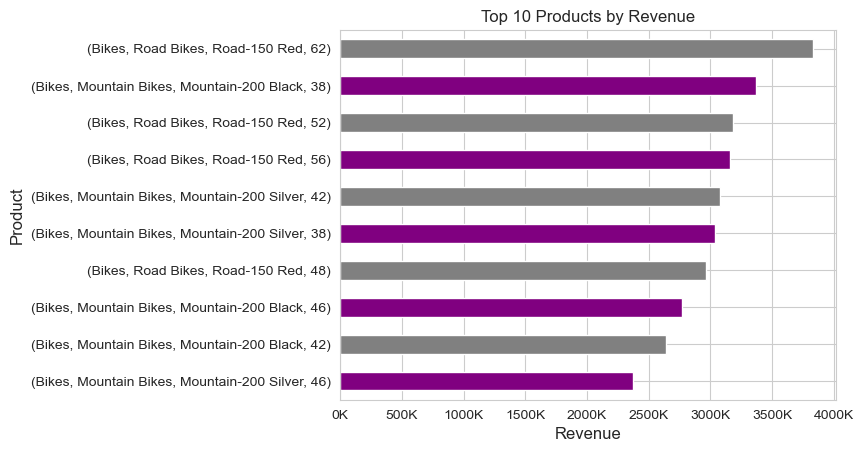

In [33]:
product_top10 = sales_df.groupby(['Product_Category', 'Sub_Category', 'Product'])['Revenue'].sum()
product_top10.sort_values(inplace=True)
product_top10 = product_top10.tail(10)
print(product_top10.sort_values(ascending=False).reset_index())
ax = product_top10.plot(kind='barh', color=['Purple', 'Grey'])
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Product', fontsize=12)
ax.ticklabel_format(style='plain', axis='x')
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.title('Top 10 Products by Revenue')
plt.show()

#### Number of Sales, Order Quantity and Revenue by Customer gender 

In [34]:
grouped_df = sales_df.groupby('Customer_Gender').agg({
    'Order_Quantity': 'sum',
    'Revenue': 'sum',
    'Customer_Gender': 'count'  # Count of sales per gender
}).rename(columns={'Customer_Gender': 'Number_of_Sales'}).reset_index()
grouped_df.Customer_Gender = ['Female', 'Male']
grouped_df

Customer_Gender  Order_Quantity   Revenue  Number_of_Sales
0          Female          645733  41935599            54724
1            Male          699583  43335409            58312

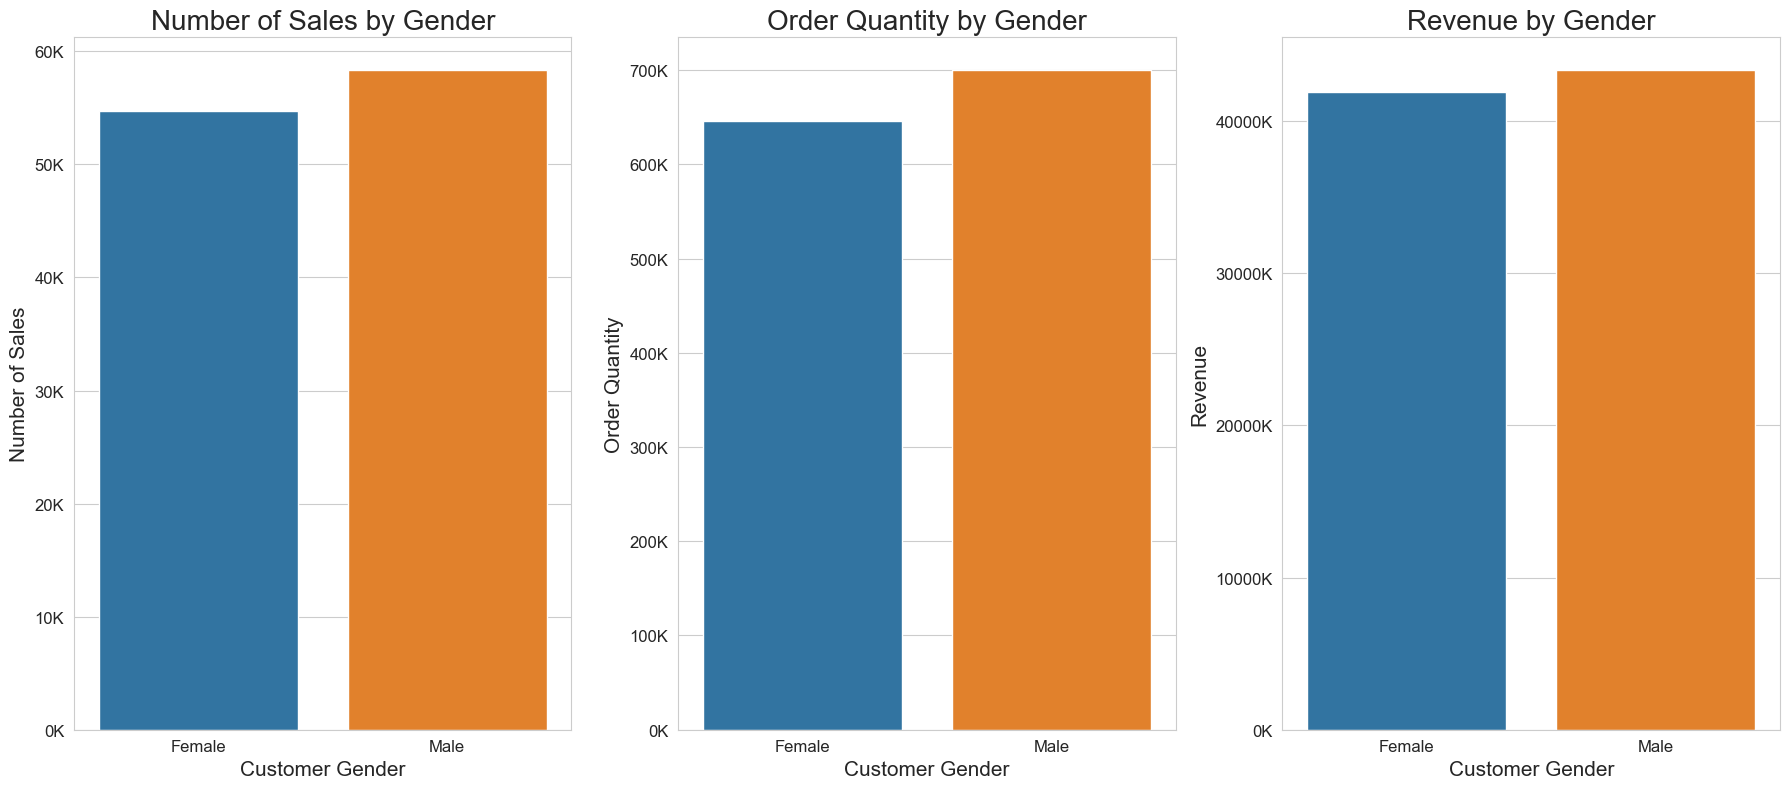

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Plotting Number of Sales by Gender
sns.barplot(data=grouped_df, x='Customer_Gender', y='Number_of_Sales', ax=axes[0])
axes[0].set_title('Number of Sales by Gender', fontsize=20)
axes[0].set_xlabel('Customer Gender', fontsize=15)
axes[0].set_ylabel('Number of Sales', fontsize=15)
axes[0].tick_params(axis='both', which='major', labelsize=12) 
axes[0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Plotting Order Quantity by Gender
sns.barplot(data=grouped_df, x='Customer_Gender', y='Order_Quantity', ax=axes[1])
axes[1].set_title('Order Quantity by Gender', fontsize=20)
axes[1].set_xlabel('Customer Gender', fontsize=15)
axes[1].set_ylabel('Order Quantity', fontsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Plotting Revenue by Gender
sns.barplot(data=grouped_df, x='Customer_Gender', y='Revenue', ax=axes[2])
axes[2].set_title('Revenue by Gender', fontsize=20)
axes[2].set_xlabel('Customer Gender', fontsize=15)
axes[2].set_ylabel('Revenue', fontsize=15)
axes[2].tick_params(axis='both', which='major', labelsize=12) 
axes[2].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

#### Number of Sales, Order Quantity and Revenue by Age Group 

In [36]:
age_grouped_df = sales_df.groupby('Age_Group').agg({
    'Order_Quantity': 'sum',
    'Revenue': 'sum',
    'Age_Group': 'count'  # Count of sales per gender
}).rename(columns={'Age_Group': 'Number_of_Sales'}).reset_index()

age_grouped_df

Age_Group  Order_Quantity   Revenue  Number_of_Sales
0        Adults (35-64)          672417  42584153            55824
1         Seniors (64+)            9877    308042              730
2  Young Adults (25-34)          446875  30655614            38654
3           Youth (<25)          216147  11723199            17828

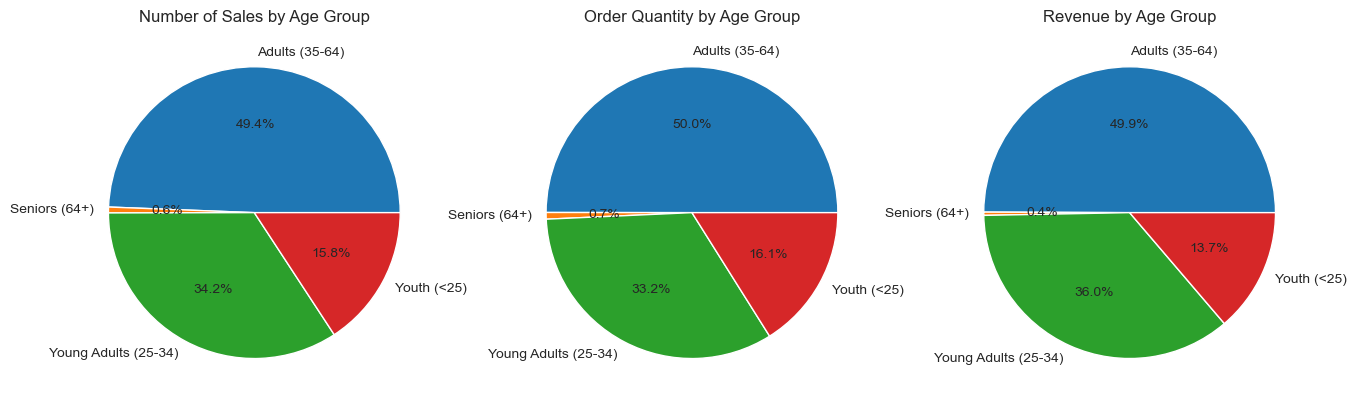

In [37]:
fig = plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2)
ax2 = fig.add_subplot(1, 3, 3)
ax0.pie(age_grouped_df['Number_of_Sales'], labels=age_grouped_df['Age_Group'], autopct='%1.1f%%')
ax0.set_title('Number of Sales by Age Group')
ax0.set_ylabel('')
ax1.pie(age_grouped_df['Order_Quantity'], labels=age_grouped_df['Age_Group'], autopct='%1.1f%%')
ax1.set_title('Order Quantity by Age Group')
ax1.set_ylabel('')
ax2.pie(age_grouped_df['Revenue'], labels=age_grouped_df['Age_Group'], autopct='%1.1f%%')
ax2.set_title('Revenue by Age Group')
ax2.set_ylabel('')
plt.show()

#### Customer Age by Country

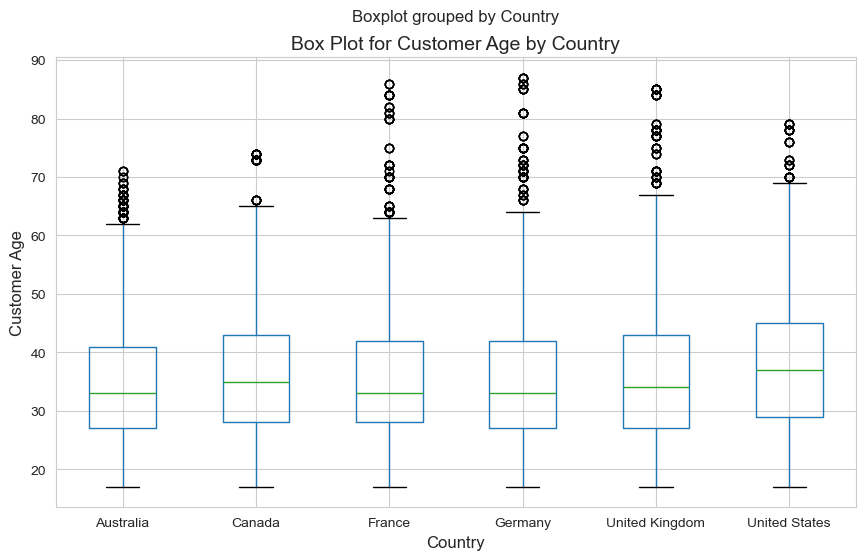

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
sales_df[['Customer_Age', 'Country']].boxplot(by='Country', ax=ax)
ax.set_title('')
plt.ylabel('Customer Age', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.title('Box Plot for Customer Age by Country', fontsize=14)
plt.show()

#### Revenue by Country

In [39]:
revenue_contury = sales_df.groupby('Country')['Revenue'].sum().reset_index()
revenue_contury

Country   Revenue
0       Australia  21302059
1          Canada   7935738
2          France   8432872
3         Germany   8978596
4  United Kingdom  10646196
5   United States  27975547

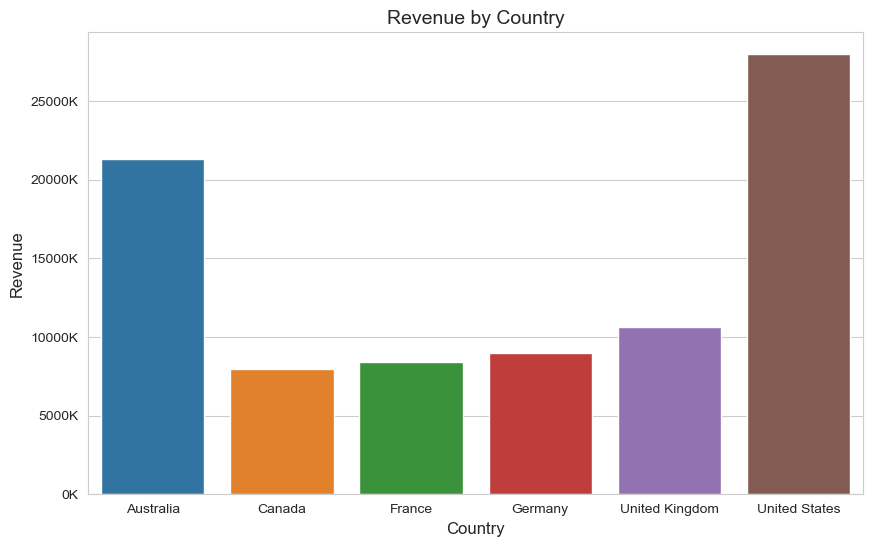

In [40]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=revenue_contury, x='Country', y='Revenue')
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.title('Revenue by Country', fontsize=14)
plt.show()

#### Top 10 Revenue generating States

In [41]:
revenue_state = sales_df.groupby(['Country', 'State'])['Revenue'].sum().reset_index()
revenue_state.sort_values(by='Revenue', ascending=False, inplace=True)
revenue_state_top10 = revenue_state.head(10)
revenue_state_top10

Country             State   Revenue
33   United States        California  17672620
30  United Kingdom           England  10646196
0        Australia   New South Wales   9203495
6           Canada  British Columbia   7877890
51   United States        Washington   6741510
1        Australia        Queensland   5066267
4        Australia          Victoria   5054839
46   United States            Oregon   3450410
27         Germany            Hessen   2073391
29         Germany          Saarland   2029545

C:\Users\deepa\AppData\Local\Temp\ipykernel_19316\3162127595.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



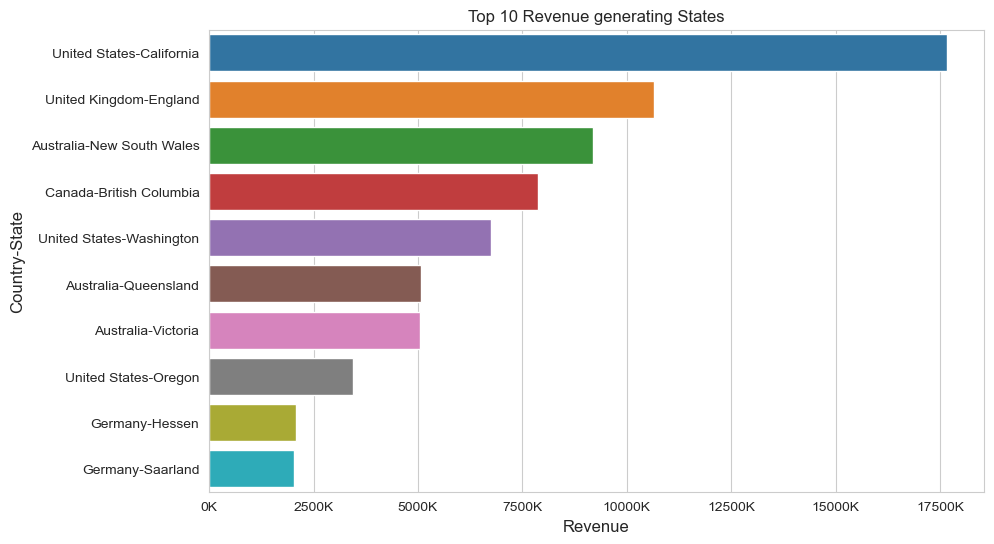

In [42]:
revenue_state_top10.loc[:, 'Country_State'] = revenue_state_top10.loc[:, 'Country'] + '-' + revenue_state_top10.loc[: ,'State']
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(data=revenue_state_top10, x='Revenue', y='Country_State')
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.ylabel('Country-State', fontsize=12)
plt.xlabel('Revenue', fontsize=12)
plt.title('Top 10 Revenue generating States')
plt.show()